# ML-Driven User Segmentation for Wolt Market Analysis 

In [829]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from pandas import json_normalize

os.chdir('E:/Study Material/Tampere - Grad/Assessements\Data Analyst Assignment - Internship 2023')

In [778]:
# Reading the data
df = pd.read_csv('dataset_for_analyst_assignment_20201120.csv')
df.head(5)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [328]:
# df['LAST_PURCHASE_DAY'].value_counts()
# df['FIRST_PURCHASE_DAY'].value_counts()

1970-01-01    10019
2019-09-21      389
2019-09-20      372
2019-09-07      358
2019-09-28      353
              ...  
2020-03-05        2
2020-09-21        2
2020-08-19        1
2019-12-24        1
2020-08-13        1
Name: FIRST_PURCHASE_DAY, Length: 427, dtype: int64

# Exploratory Data Analysis

In [724]:
#Check for missing data:
print(df.isnull().sum())
# Checking duplicated values
print(df.duplicated().sum())

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES       

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

In [644]:
df.PREFERRED_DEVICE.value_counts(normalize=True)

ios        0.444865
android    0.385577
web        0.169557
Name: PREFERRED_DEVICE, dtype: float64

In [645]:
df.TOTAL_PURCHASES_EUR.describe()

count    12028.000000
mean       176.210419
std        299.086986
min          1.012000
25%         32.384000
50%         75.900000
75%        196.328000
max       7979.620000
Name: TOTAL_PURCHASES_EUR, dtype: float64

In [727]:
df.PURCHASE_COUNT.describe()

count    21983.000000
mean         3.345358
std          8.523171
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        320.000000
Name: PURCHASE_COUNT, dtype: float64

In [794]:
# Group data by REGISTRATION_COUNTRY variable and calculate the PURCHASE_COUNT and mean for TOTAL_PURCHASES_EUR variables
df.groupby('REGISTRATION_COUNTRY').agg({'PURCHASE_COUNT': 'sum', 'TOTAL_PURCHASES_EUR': 'mean'})

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR
REGISTRATION_COUNTRY,,
ARE,2,4.048000
AUS,0,0.000000
AUT,0,0.000000
AZE,0,0.000000
BEL,0,0.000000
BRA,0,0.000000
CAN,5,17.035333
CHE,0,0.000000
CHL,0,0.000000


# Data Cleaning

In [779]:
data= df

# Imputing missing values with either mean or 0 for numerical columns whichever is more suitable for each field by looking at data
num_cols_mean = []

for col in num_cols_mean:
    data[col] = data[col].fillna(data[col].mean())
    
num_cols_zeroes= ['PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY', 'MIN_PURCHASE_VALUE_EUR', 'BREAKFAST_PURCHASES', 
                  'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES','FIRST_PURCHASE_DAY',
                  'LAST_PURCHASE_DAY','TOTAL_PURCHASES_EUR', 'DISTINCT_PURCHASE_VENUE_COUNT', 'AVG_PURCHASE_VALUE_EUR', 
                 'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS']

for col in num_cols_zeroes:
    data[col] = data[col].fillna(0)

# Fill missing values with max for MAX_PURCHASE_VALUE_EUR column
data['MAX_PURCHASE_VALUE_EUR'].fillna(data['MAX_PURCHASE_VALUE_EUR'].max(), inplace=True)

data['AVG_DAYS_BETWEEN_PURCHASES'].fillna(data['MEDIAN_DAYS_BETWEEN_PURCHASES'].median(), inplace=True)

# Fill missing values with median for MEDIAN_DAYS_BETWEEN_PURCHASES column
data['MEDIAN_DAYS_BETWEEN_PURCHASES'].fillna(data['MEDIAN_DAYS_BETWEEN_PURCHASES'].median(), inplace=True)

# Imputing missing values with mode for categorical columns and few numercial columns which make sense for mode imputation
cat_cols = ['PREFERRED_DEVICE', 'PREFERRED_RESTAURANT_TYPES', 'PURCHASE_COUNT_BY_STORE_TYPE', 'USER_HAS_VALID_PAYMENT_METHOD', 
            'MOST_COMMON_WEEKDAY_TO_PURCHASE','MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE']
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])
    
# Verify that there are no more missing values
print(data.isnull().sum())

REGISTRATION_DATE                          0
REGISTRATION_COUNTRY                       0
PURCHASE_COUNT                             0
PURCHASE_COUNT_DELIVERY                    0
PURCHASE_COUNT_TAKEAWAY                    0
FIRST_PURCHASE_DAY                         0
LAST_PURCHASE_DAY                          0
USER_ID                                    0
BREAKFAST_PURCHASES                        0
LUNCH_PURCHASES                            0
EVENING_PURCHASES                          0
DINNER_PURCHASES                           0
LATE_NIGHT_PURCHASES                       0
TOTAL_PURCHASES_EUR                        0
DISTINCT_PURCHASE_VENUE_COUNT              0
MIN_PURCHASE_VALUE_EUR                     0
MAX_PURCHASE_VALUE_EUR                     0
AVG_PURCHASE_VALUE_EUR                     0
PREFERRED_DEVICE                           0
IOS_PURCHASES                              0
WEB_PURCHASES                              0
ANDROID_PURCHASES                          0
PREFERRED_

In [648]:
data.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,0.0,0.0,0,0,1,0.0,0.0,...,0.0,0.0,"[\n ""american""\n]",False,18.0,7.0,25.0,25.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,"[\n ""american""\n]",False,23.0,2.0,25.0,25.0,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,"[\n ""american""\n]",True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,0.0,0.0,0,0,4,0.0,0.0,...,0.0,0.0,"[\n ""american""\n]",False,18.0,7.0,25.0,25.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,0.0,0.0,0,0,5,0.0,0.0,...,0.0,0.0,"[\n ""american""\n]",False,18.0,7.0,25.0,25.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [780]:
#Convert date columns to datetime format
data['FIRST_PURCHASE_DAY'] = pd.to_datetime(data['FIRST_PURCHASE_DAY'])
data['LAST_PURCHASE_DAY'] = pd.to_datetime(data['LAST_PURCHASE_DAY'])
#Convert boolean column to integer
data['USER_HAS_VALID_PAYMENT_METHOD'] = data['USER_HAS_VALID_PAYMENT_METHOD'].astype(int)

data.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,0.0,0.0,1970-01-01,1970-01-01,1,0.0,0.0,...,0.0,0.0,"[\n ""american""\n]",0,18.0,7.0,25.0,25.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,0.0,1.0,"[\n ""american""\n]",0,23.0,2.0,25.0,25.0,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,...,19.0,0.0,"[\n ""american""\n]",1,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,0.0,0.0,1970-01-01,1970-01-01,4,0.0,0.0,...,0.0,0.0,"[\n ""american""\n]",0,18.0,7.0,25.0,25.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,0.0,0.0,1970-01-01,1970-01-01,5,0.0,0.0,...,0.0,0.0,"[\n ""american""\n]",0,18.0,7.0,25.0,25.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


# Feature Engineering

In [782]:
# Total Purchases
data['TOTAL_PURCHASES'] = data[['IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES']].sum(axis=1)

# Average Purchase Frequency
data['AVERAGE_PURCHASE_FREQUENCY'] = 1/data['AVG_DAYS_BETWEEN_PURCHASES'].fillna(0)

# Average amount of money a user spends across all restaurants they have visited
data['AVG_PURCHASE_VALUE_VENUE'] = data['TOTAL_PURCHASES_EUR'] / data['DISTINCT_PURCHASE_VENUE_COUNT'].fillna(0)
data['AVG_PURCHASE_VALUE_VENUE'] = data['AVG_PURCHASE_VALUE_VENUE'].fillna(0)

# Average number of purchases made per day by a customer
data['PURCHASES_PER_DAY'] = data['PURCHASE_COUNT'] / (pd.to_datetime(data['LAST_PURCHASE_DAY']) - pd.to_datetime(data['FIRST_PURCHASE_DAY'])).dt.days.fillna(0)
data['PURCHASES_PER_DAY'] = data['PURCHASES_PER_DAY'].fillna(0)

# Average amount of money a user spends at each restaurant on average.
data['AVG_PURCHASE_VALUE_PER_VENUE'] = data['AVG_PURCHASE_VALUE_EUR'] / data['DISTINCT_PURCHASE_VENUE_COUNT']
data['AVG_PURCHASE_VALUE_PER_VENUE'] = data['AVG_PURCHASE_VALUE_PER_VENUE'].fillna(0)

# Calculate time since registration (in days)
data['REGISTRATION_DATE'] = pd.to_datetime(data['REGISTRATION_DATE'])
data['DAYS_SINCE_REGISTRATION'] = (now - data['REGISTRATION_DATE']).dt.days.fillna(0)

data.head(5)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,TOTAL_PURCHASES,AVERAGE_PURCHASE_FREQUENCY,AVG_PURCHASE_VALUE_VENUE,PURCHASES_PER_DAY,AVG_PURCHASE_VALUE_PER_VENUE,DAYS_SINCE_REGISTRATION
0,2019-09-01,DNK,0,0.0,0.0,1970-01-01,1970-01-01,1,0.0,0.0,...,25.0,25.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0.0,0.040000,0.000000,0.000000,0.000000,1270
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,25.0,25.0,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",1.0,0.040000,38.456000,inf,38.456000,1270
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,...,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",19.0,0.111111,70.165333,0.113772,3.710667,1270
3,2019-09-01,FIN,0,0.0,0.0,1970-01-01,1970-01-01,4,0.0,0.0,...,25.0,25.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0.0,0.040000,0.000000,0.000000,0.000000,1270
4,2019-09-01,GRC,0,0.0,0.0,1970-01-01,1970-01-01,5,0.0,0.0,...,25.0,25.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0.0,0.040000,0.000000,0.000000,0.000000,1270


In [783]:
print(data.TOTAL_PURCHASES_EUR.describe())

count    21983.000000
mean        96.413543
std        237.983688
min          0.000000
25%          0.000000
50%         16.192000
75%         87.538000
max       7979.620000
Name: TOTAL_PURCHASES_EUR, dtype: float64


# Customer Segmentation Analysis

> Mainly there are four types of market segmentation: Demographic, psychographic, behavioral and geographic segmentation 

However, in this case, due to a lack of information on demographic and psychographic segmentation, mainly behavioral segmentation will be used to classify users. And since we do have registration country, we will do some demographic analysis as well. Specifically, customer behavior, as reflected in the average days between purchases, will be used to 
segment and classify users. This approach will enable the business to gain insights into how often 
users purchase, what products or services they prefer, and other patterns in user behavior that can 
be used to optimize marketing strategies and improve customer experience.

## K-Means Clustering

In [900]:
# Select relevant columns for clustering analysis
cluster_data = data[['PURCHASE_COUNT', 'PURCHASE_COUNT_DELIVERY','PURCHASE_COUNT_TAKEAWAY', 
                     'AVG_PURCHASE_VALUE_EUR', 'TOTAL_PURCHASES_EUR','AVG_PURCHASE_VALUE_EUR', 
                     'PREFERRED_DEVICE','AVG_PURCHASE_VALUE_VENUE','AVG_DAYS_BETWEEN_PURCHASES']]
                    
# Drop any rows with missing values
# cluster_data = cluster_data.dropna()

# Remove non-numeric columns
cluster_data = cluster_data.select_dtypes(include=[np.number])

# Scale the data to have mean=0 and standard deviation=1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Perform K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original DataFrame
data['CLUSTER'] = kmeans.labels_

# Display the size of each cluster
print(data['CLUSTER'].value_counts())

1    12531
3     7158
2     1250
0      963
4       81
Name: CLUSTER, dtype: int64


In [796]:
data['CLUSTER'].value_counts(normalize=True)

1    0.570031
3    0.325615
2    0.056862
0    0.043807
4    0.003685
Name: CLUSTER, dtype: float64

> Cluster 1 accounts for more than half the users at 57% while custer 3 at one-third at 32.5%. More details about each cluster
will be provided in the further sections

In [797]:
data.AVG_DAYS_BETWEEN_PURCHASES.describe()

count    21983.000000
mean        38.999318
std         47.225619
min          0.000000
25%         25.000000
50%         25.000000
75%         25.000000
max        421.000000
Name: AVG_DAYS_BETWEEN_PURCHASES, dtype: float64

In [799]:
data.TOTAL_PURCHASES_EUR.describe()

count    21983.000000
mean        96.413543
std        237.983688
min          0.000000
25%          0.000000
50%         16.192000
75%         87.538000
max       7979.620000
Name: TOTAL_PURCHASES_EUR, dtype: float64

In [800]:
data.groupby('CLUSTER').agg({'PURCHASE_COUNT': 'count', 'AVG_DAYS_BETWEEN_PURCHASES': 'mean','TOTAL_PURCHASES_EUR':'mean'})

,PURCHASE_COUNT,AVG_DAYS_BETWEEN_PURCHASES,TOTAL_PURCHASES_EUR
CLUSTER,,,
0,963,223.815161,78.964374
1,12531,25.726997,5.412032
2,1250,17.430400,676.232973
3,7158,41.521235,132.539624
4,81,5.012346,2241.829877


> Customer Types based on Clusters:

> We can see that there is a trend within the clusters:

We can observe distinct customer segments based on their purchase behavior on Wolt app:

>Cluster 0: Infrequent Buyers

Customers whose purchase count is very low (~4% of total customers)  
Average days between purchases is extremely high at 223  
Mean for total purchases is at ~78

>Cluster 1: Common Users

Largest customer segment with more than half (~57%) of total customers  
Average days between each purchase is around ~25 days  
Mean for total purchases is quite low at 5.41

>Cluster 2: High-Value Customers

Customers whose purchase count is relatively low (~ 5.6%)    
Average days between each purchase is relatively less (~17 days)  
Mean for total purchases is significantly high at 676

>Cluster 3: Occasional Buyers

Customers whose purchase count is around one-third (~33%) of total customers  
Average days between each purchase is around 41 days  
Mean for total purchases is above the overall mean at 132

>Cluster 4: High-Spending Customers

Customers whose purchase count is extremely low (~ 0.37%)  
Average days between each purchase is also the lowest at just 5 days  
Mean for total purchases is the highest at 2241.

In [918]:
data_df= data

data_df['CLUSTER'].replace({
    0: 'Infrequent Buyers',
    1: 'Common Users',
    2: 'High-Value Customers',
    3: 'Occasional Buyers',
    4: 'High-Spending Customers'
}, inplace=True)

In [947]:
data_df.groupby('CLUSTER').agg({'PURCHASE_COUNT': 'count', 'AVG_DAYS_BETWEEN_PURCHASES': 'mean','TOTAL_PURCHASES_EUR':'mean'})

,PURCHASE_COUNT,AVG_DAYS_BETWEEN_PURCHASES,TOTAL_PURCHASES_EUR
CLUSTER,,,
Common Users,12531,25.726997,5.412032
High-Spending Customers,81,5.012346,2241.829877
High-Value Customers,1250,17.430400,676.232973
Infrequent Buyers,963,223.815161,78.964374
Occasional Buyers,7158,41.521235,132.539624


<AxesSubplot: xlabel='CLUSTER', ylabel='count'>

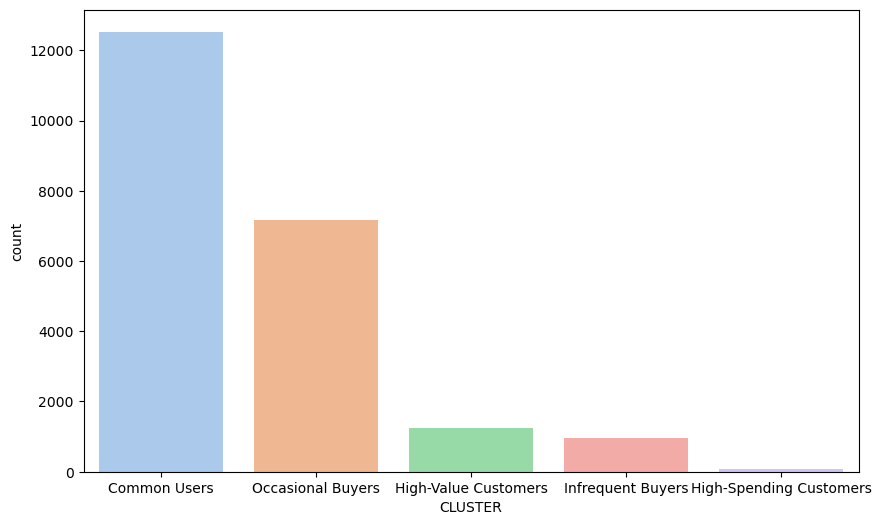

In [838]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CLUSTER', data=data_df, palette='pastel')

In [919]:
fig = px.scatter(
    data_frame=data_df,
    x = "PURCHASE_COUNT",
    y= "TOTAL_PURCHASES_EUR",
    title = "Relationship between PURCHASE COUNT VS TOTAL PURCHASES EURO",
    color = "CLUSTER",
    height=500
)
fig.show()

In [818]:
data_df.groupby(['CLUSTER', 'PREFERRED_DEVICE'])['USER_ID'].count().unstack()

PREFERRED_DEVICE,android,ios,web
CLUSTER,,,
Common Users,5451,5561,1519
High-Spending Customers,29,27,25
High-Value Customers,401,550,299
Infrequent Buyers,314,427,222
Occasional Buyers,2253,3255,1650


> Most of the users across all customer groups are mobile users

In [944]:
data_df.groupby('CLUSTER').agg(MOST_COMMON_WEEKDAY_TO_PURCHASE=('MOST_COMMON_WEEKDAY_TO_PURCHASE', lambda x: (x.mode(), x.value_counts().max())),
                               MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE=('MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', lambda x: (x.mode(), x.value_counts().max())))

,MOST_COMMON_WEEKDAY_TO_PURCHASE,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE
CLUSTER,,
Common Users,"([7.0], 10331)","([18.0], 10056)"
High-Spending Customers,"([4.0], 20)","([3.0, 7.0, 23.0], 6)"
High-Value Customers,"([3.0], 198)","([3.0], 63)"
Infrequent Buyers,"([7.0], 152)","([2.0], 54)"
Occasional Buyers,"([1.0], 1069)","([18.0], 341)"


> Sunday is the most common weekday for purchases, which suggests that many customers may be using this day for shopping, whether it's for routine items or for leisure activities

> High-Spending and High-Value Customers are more likely to make purchases on Wednesdays and Thursdays, suggesting that these customers may have more discretionary income and time to shop during the week

> Common Users and Occasional Buyers are most likely to make purchases in the evening at 6 pm, which could suggest that these customers may be working during the day and shopping on their way home from work

In [926]:
# Get the value counts for REGISTRATION_COUNTRY
country_counts = data_df['REGISTRATION_COUNTRY'].value_counts()

# Filter for countries with count > 8
filtered_countries = country_counts[country_counts > 8].index.tolist()

# Filter the data_df dataframe for the filtered countries
filtered_df = data_df[data_df['REGISTRATION_COUNTRY'].isin(filtered_countries)]

# Get the cross-tabulation of CLUSTER and REGISTRATION_COUNTRY
crosstab_df = pd.crosstab(filtered_df['CLUSTER'], filtered_df['REGISTRATION_COUNTRY'], normalize=False)

# Display the cross-tabulation dataframe
crosstab_df

REGISTRATION_COUNTRY,AUS,BEL,CZE,DEU,DNK,ESP,EST,FIN,FRA,GBR,GRC,HUN,ISR,ITA,LTU,NLD,NOR,POL,SWE,USA
CLUSTER,,,,,,,,,,,,,,,,,,,,
Common Users,11,11,10,39,3548,19,33,5943,9,52,2507,8,6,24,20,10,23,19,42,70
High-Spending Customers,0,0,0,0,29,0,0,40,0,0,12,0,0,0,0,0,0,0,0,0
High-Value Customers,0,0,1,0,540,0,1,587,0,0,119,0,0,0,0,0,1,0,0,0
Infrequent Buyers,0,0,0,0,425,0,1,447,0,0,87,1,1,0,0,0,0,0,1,0
Occasional Buyers,0,0,3,0,3539,0,9,3260,2,2,317,2,2,0,2,0,10,4,2,0


> Our main registration countries are Finland, Denmark, and Greece  across all customer groups

> All the registered customers for USA are Common Users  

In [867]:
# USER_HAS_VALID_PAYMENT_METHOD
data_df.groupby('CLUSTER')['USER_HAS_VALID_PAYMENT_METHOD'].value_counts(normalize=True)

CLUSTER                  USER_HAS_VALID_PAYMENT_METHOD
Common Users             0                                0.843109
                         1                                0.156891
High-Spending Customers  1                                0.790123
                         0                                0.209877
High-Value Customers     1                                0.692000
                         0                                0.308000
Infrequent Buyers        1                                0.585670
                         0                                0.414330
Occasional Buyers        1                                0.574043
                         0                                0.425957
Name: USER_HAS_VALID_PAYMENT_METHOD, dtype: float64

> Interestingly, the most common users don't have a valid payment method, it suggests that there might be some issues with the payment system on the Wolt platform or that the payment methods available are not convenient for this particular user group which seems bit stretch as its the most common group. This might impact the overall revenue of Wolt. Therefore, it is may be necessary to investigate why these users are not able to use a valid payment method and take steps to address any issues that
are preventing them from doing so.

In [921]:
data.groupby('CLUSTER')['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES','EVENING_PURCHASES','DINNER_PURCHASES',
                        'LATE_NIGHT_PURCHASES'].aggregate('sum')

,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES
CLUSTER,,,,,
Common Users,280.0,2114.0,927.0,1844.0,0.0
High-Spending Customers,324.0,3407.0,565.0,2692.0,0.0
High-Value Customers,889.0,11783.0,2296.0,14781.0,0.0
Infrequent Buyers,55.0,787.0,186.0,1256.0,0.0
Occasional Buyers,785.0,10476.0,1961.0,15860.0,0.0


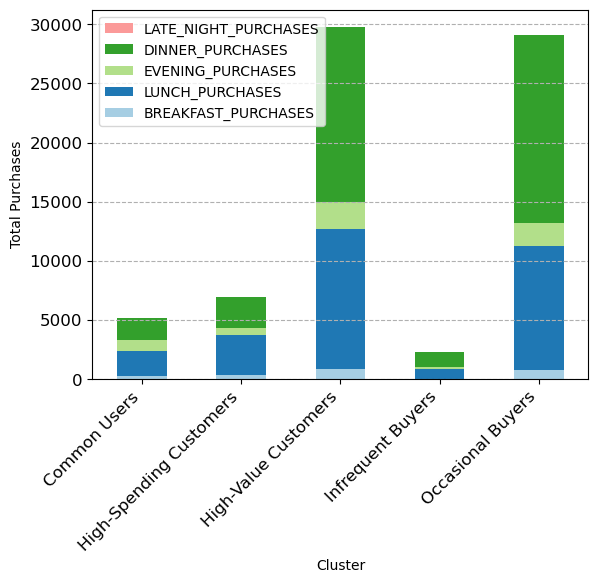

In [861]:
# Aggregate total purchases by cluster for each meal time category
meal_purchases = data.groupby('CLUSTER')['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES','EVENING_PURCHASES','DINNER_PURCHASES',
                                         'LATE_NIGHT_PURCHASES'].sum()

# Set color palette for the chart
sns.set_palette("Paired")

# Create the stacked bar chart
ax = meal_purchases.plot(kind='bar', stacked=True)
ax.set_ylabel('Total Purchases')
ax.set_xlabel('Cluster')

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')

# add grid and adjust tick labels
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.show()

>  It can be observed that the most commonly ordered meals by Wolt customers are lunch or dinner. Interestingly, there is no data available on late-night meals in this particular dataset.

> The analysis further also reveals that infrequent and high-value customers primarily place orders for lunch and dinner aswell. To capitalize on this trend, it is essential to focus on creating more attractive deals and promotional reminders during these time periods. This will help to redirect users to utilize the services and boost sales.

*Examining PURCHASE_COUNT_BY_STORE_TYPE Field*

In [833]:
# Normalize the nested JSON data into separate columns
nested_cols = json_normalize(data_df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(eval))
data_n = pd.concat([data_df, nested_cols], axis=1)

# View the updated DataFrame
data_n.head(5)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,AVG_PURCHASE_VALUE_VENUE,PURCHASES_PER_DAY,AVG_PURCHASE_VALUE_PER_VENUE,DAYS_SINCE_REGISTRATION,CLUSTER,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
0,2019-09-01,DNK,0,0.0,0.0,1970-01-01,1970-01-01,1,0.0,0.0,...,0.000000,0.000000,0.000000,1270,Common Users,0,0,0,0,0
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,38.456000,inf,38.456000,1270,Occasional Buyers,0,0,0,1,0
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,...,70.165333,0.113772,3.710667,1270,High-Value Customers,1,9,0,9,0
3,2019-09-01,FIN,0,0.0,0.0,1970-01-01,1970-01-01,4,0.0,0.0,...,0.000000,0.000000,0.000000,1270,Common Users,0,0,0,0,0
4,2019-09-01,GRC,0,0.0,0.0,1970-01-01,1970-01-01,5,0.0,0.0,...,0.000000,0.000000,0.000000,1270,Common Users,0,0,0,0,0


In [849]:
table = pd.pivot_table(data_n, 
                       index='CLUSTER', 
                       values=['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store'], 
                       aggfunc='sum')
table

,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
CLUSTER,,,,,
Common Users,71,294,0,4432,406
High-Spending Customers,0,1614,37,3486,1872
High-Value Customers,495,7102,138,14619,7494
Infrequent Buyers,0,0,0,2295,0
Occasional Buyers,876,3697,0,19860,4753


<Figure size 1000x600 with 0 Axes>

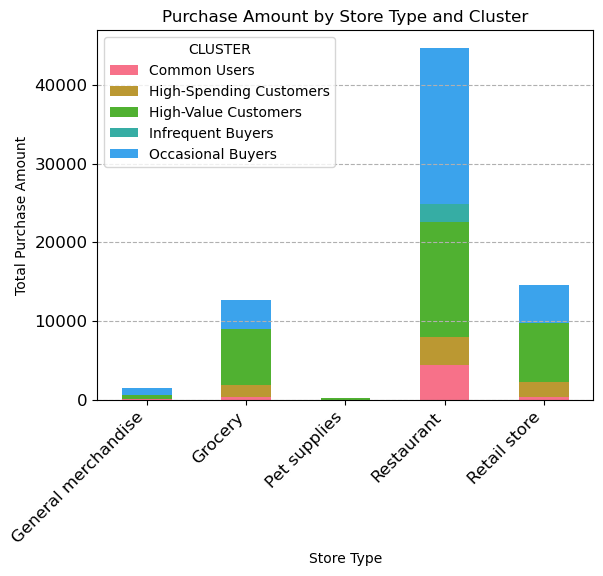

In [870]:
plt.figure(figsize=(10, 6))

store_types = ['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store']
cluster_sums = [data_n.groupby('CLUSTER')[store_type].sum() for store_type in store_types]
df_n = pd.DataFrame(cluster_sums, index=store_types)

sns.set_palette("husl")
ax = df_n.plot(kind='bar', stacked=True)
ax.set_ylabel('Total Purchase Amount')
ax.set_xlabel('Store Type')
ax.set_title('Purchase Amount by Store Type and Cluster')
# add grid and adjust tick labels
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

> The general pattern here is most customers have highest purchases in numbers via restaurant, retail store 
and grocery respectively which is quite usual for a delivery platform app mainly made for these purposes. Pet supplies are
only bought by High-Value and High-Spending Customers, which is an interesting insight

> Infrequent Buyers only buy from restaurants

In [882]:
table = pd.pivot_table(data_n, values=['PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY'], index='CLUSTER', aggfunc='sum')

print(table)

                         PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY
CLUSTER                                                                  
Common Users                              4927.0                    276.0
High-Spending Customers                   6927.0                     82.0
High-Value Customers                     27758.0                   2090.0
Infrequent Buyers                         2098.0                    197.0
Occasional Buyers                        27351.0                   1835.0


> Customers usually prefer deliver orders than takeaways as usually delivery is more convenient and less time-consuming for 
them. To improve takeaways, offering faster service and more convenient pickup options such as curbside pickup or 
self-service may help to attract more customers

> High-Value Customers and Occasional Buyers very occasionally do get takeaways

# Preffered Restaurants

In [884]:
data_n[data_n['CLUSTER'] == "Common Users"].PREFERRED_RESTAURANT_TYPES.value_counts()

[\n  "american"\n]                                               12449
[\n  "italian"\n]                                                   25
[\n  "japanese"\n]                                                  13
[\n  "mexican"\n]                                                   10
[\n  "american",\n  "italian"\n]                                     8
[\n  "middle eastern"\n]                                             8
[\n  "american",\n  "mexican"\n]                                     3
[\n  "indian"\n]                                                     3
[\n  "american",\n  "italian",\n  "mexican"\n]                       2
[\n  "greek"\n]                                                      2
[\n  "italian",\n  "middle eastern"\n]                               1
[\n  "middle eastern",\n  "greek"\n]                                 1
[\n  "middle eastern",\n  "american"\n]                              1
[\n  "hawaiian"\n]                                                   1
[\n  "

In [887]:
data_n[data_n['CLUSTER'] == "High-Spending Customers"].PREFERRED_RESTAURANT_TYPES.value_counts()

[\n  "american"\n]                                                                                   35
[\n  "american",\n  "mexican"\n]                                                                      2
[\n  "american",\n  "japanese"\n]                                                                     2
[\n  "italian"\n]                                                                                     2
[\n  "italian",\n  "american"\n]                                                                      2
[\n  "american",\n  "italian",\n  "mexican",\n  "middle eastern"\n]                                   2
[\n  "japanese",\n  "american",\n  "middle eastern",\n  "mexican",\n  "italian",\n  "thai"\n]         1
[\n  "mexican",\n  "american",\n  "japanese"\n]                                                       1
[\n  "italian",\n  "american",\n  "japanese",\n  "indian"\n]                                          1
[\n  "american",\n  "mexican",\n  "italian",\n  "middle eastern"

In [888]:
data_n[data_n['CLUSTER'] == "High-Value Customers"].PREFERRED_RESTAURANT_TYPES.value_counts()

[\n  "american"\n]                                                             673
[\n  "italian"\n]                                                               50
[\n  "japanese"\n]                                                              47
[\n  "american",\n  "italian"\n]                                                40
[\n  "american",\n  "italian",\n  "mexican"\n]                                  40
                                                                              ... 
[\n  "indian",\n  "japanese",\n  "middle eastern",\n  "italian"\n]               1
[\n  "japanese",\n  "italian",\n  "thai"\n]                                      1
[\n  "japanese",\n  "italian"\n]                                                 1
[\n  "japanese",\n  "thai",\n  "vietnamese",\n  "american",\n  "italian"\n]      1
[\n  "american",\n  "italian",\n  "thai",\n  "vietnamese"\n]                     1
Name: PREFERRED_RESTAURANT_TYPES, Length: 184, dtype: int64

In [889]:
data_n[data_n['CLUSTER'] == "Infrequent Buyers"].PREFERRED_RESTAURANT_TYPES.value_counts()

[\n  "american"\n]                                              857
[\n  "japanese"\n]                                               30
[\n  "italian"\n]                                                29
[\n  "indian"\n]                                                 11
[\n  "mexican"\n]                                                 8
[\n  "middle eastern"\n]                                          7
[\n  "korean"\n]                                                  4
[\n  "vietnamese"\n]                                              4
[\n  "american",\n  "italian"\n]                                  3
[\n  "italian",\n  "japanese"\n]                                  2
[\n  "japanese",\n  "indian"\n]                                   1
[\n  "italian",\n  "indian"\n]                                    1
[\n  "greek",\n  "middle eastern"\n]                              1
[\n  "italian",\n  "middle eastern"\n]                            1
[\n  "american",\n  "middle eastern"\n]         

In [891]:
data_n[data_n['CLUSTER'] == "Occasional Buyers"].PREFERRED_RESTAURANT_TYPES.value_counts()

[\n  "american"\n]                                       5933
[\n  "japanese"\n]                                        277
[\n  "italian"\n]                                         239
[\n  "mexican"\n]                                         144
[\n  "indian"\n]                                           83
                                                         ... 
[\n  "american",\n  "korean"\n]                             1
[\n  "japanese",\n  "vietnamese"\n]                         1
[\n  "greek"\n]                                             1
[\n  "middle eastern",\n  "chinese",\n  "japanese"\n]       1
[\n  "chinese",\n  "italian"\n]                             1
Name: PREFERRED_RESTAURANT_TYPES, Length: 97, dtype: int64

> Overall, American Restaurant seems to be the most obvious choice across all user groups with occasionally Japanese, Italian,
Mexican and Indian Restaurants also getting attention.

> Occasional Buyers only seem to be bit more versatile in terms of choosing compared to other customer groups  

> High Spending Customers seems only to be preferring American Restaurants

# Conclusion

> Based on the customer segmentation analysis, the following suggestions and recommendations can be made to improve the customer experience for Wolt app:

>> Payment System Improvement: As the most common users don't have a valid payment method, it is necessary to investigate why these users are not able to use a valid payment method and take steps to address any issues that are preventing them from doing so. The payment system should be improved to offer more convenient payment options for all user groups.

>> Focus on creating more attractive deals and promotional reminders: Infrequent and high-value customers primarily place orders for lunch and dinner. It is essential to focus on creating more attractive deals and promotional reminders during these time periods to redirect users to utilize the services and boost sales.

>> Convenient pickup options for takeaways: Customers usually prefer delivery orders to takeaways, offering faster service and more convenient pickup options such as curbside pickup or self-service may help to attract more customers to use the takeaway option.

>> Diversify Restaurant Choices: While American restaurants are the most obvious choice across all user groups, occasional buyers seem to be a bit more versatile in terms of choosing. To attract more customers, Wolt should focus on diversifying the restaurant choices and add more variety of international cuisine options.

>> Purchase Timing Insights: Insights on the most common weekday and hour of the day for customer purchases can help Wolt better understand consumer behavior and tailor their marketing and sales strategies to maximize their revenue. For example, offering promotions and discounts on Sundays could attract more customers, while targeting high-value customers with personalized marketing campaigns on Wednesdays and Thursdays could increase sales. By analyzing these key customer behavior patterns, businesses can gain a deeper understanding of their customers and make more informed decisions to improve their bottom line.

>> Expand services to late-night meals: As there is no data available on late-night meals in the dataset, it may be worthwhile to explore the possibility of expanding services to late-night meals to attract more customers and boost sales.

> Overall, the recommendations and suggestions aim to improve the payment system, boost sales, and attract more customers by providing more convenient and diversified choices for restaurant selection and expanding services.